In [5]:
using LinearAlgebra, DataFrames, CSV, ProgressMeter
Base.:(+)(a::String, b::String) = string(a,b)
pwd()

"/run/media/kryohi/Data/Uni/Tesi/cas9_md/notebooks"

In [6]:
plotpath = "../plots/";
datapath = "../data/analysis/";
output_name = "prod_global_";

In [7]:
using CairoMakie

In [14]:
function pairplot(df; stride=10, cmap=:thermal, resolution=(1400,1400), cbar=false, cbar_range=(0,1))
    
    dim = size(df,2) # how many colums there are in the dataframe
    idxs = 1:stride:size(df,1)
    colorant = range(0, 1, length=length(idxs))

    pp_theme = Attributes(
        Axis = (
            aspect = 1.02,
            topspinevisible = false,
            rightspinevisible = false,
            xticklabelsvisible = false,
            yticklabelsvisible = false
        ),
        Scatter = (
            colormap = cmap, # try :thermal :Oranges_9, :darkrainbow
            markersize = 6
        )
    )

    f = with_theme(pp_theme) do
        f = Figure(resolution=resolution)

        for i in 1:dim, j in 1:dim

            ax = Axis(f[i, j])
            scatter!(df[idxs,j], df[idxs,i], color = colorant)

            if i==dim
                ax.xticklabelsvisible = true
                ax.xlabel = names(df)[j]
            end
            if j==1
                ax.yticklabelsvisible = true
                ax.ylabel = names(df)[i]
            end

        end
        if cbar
            Colorbar(f[:, dim+1], limits = cbar_range, size = 20,
                colormap = colormap, label = "Time [ns]", ticks = LinearTicks(7))
        end
        f
    end
end


pairplot (generic function with 1 method)

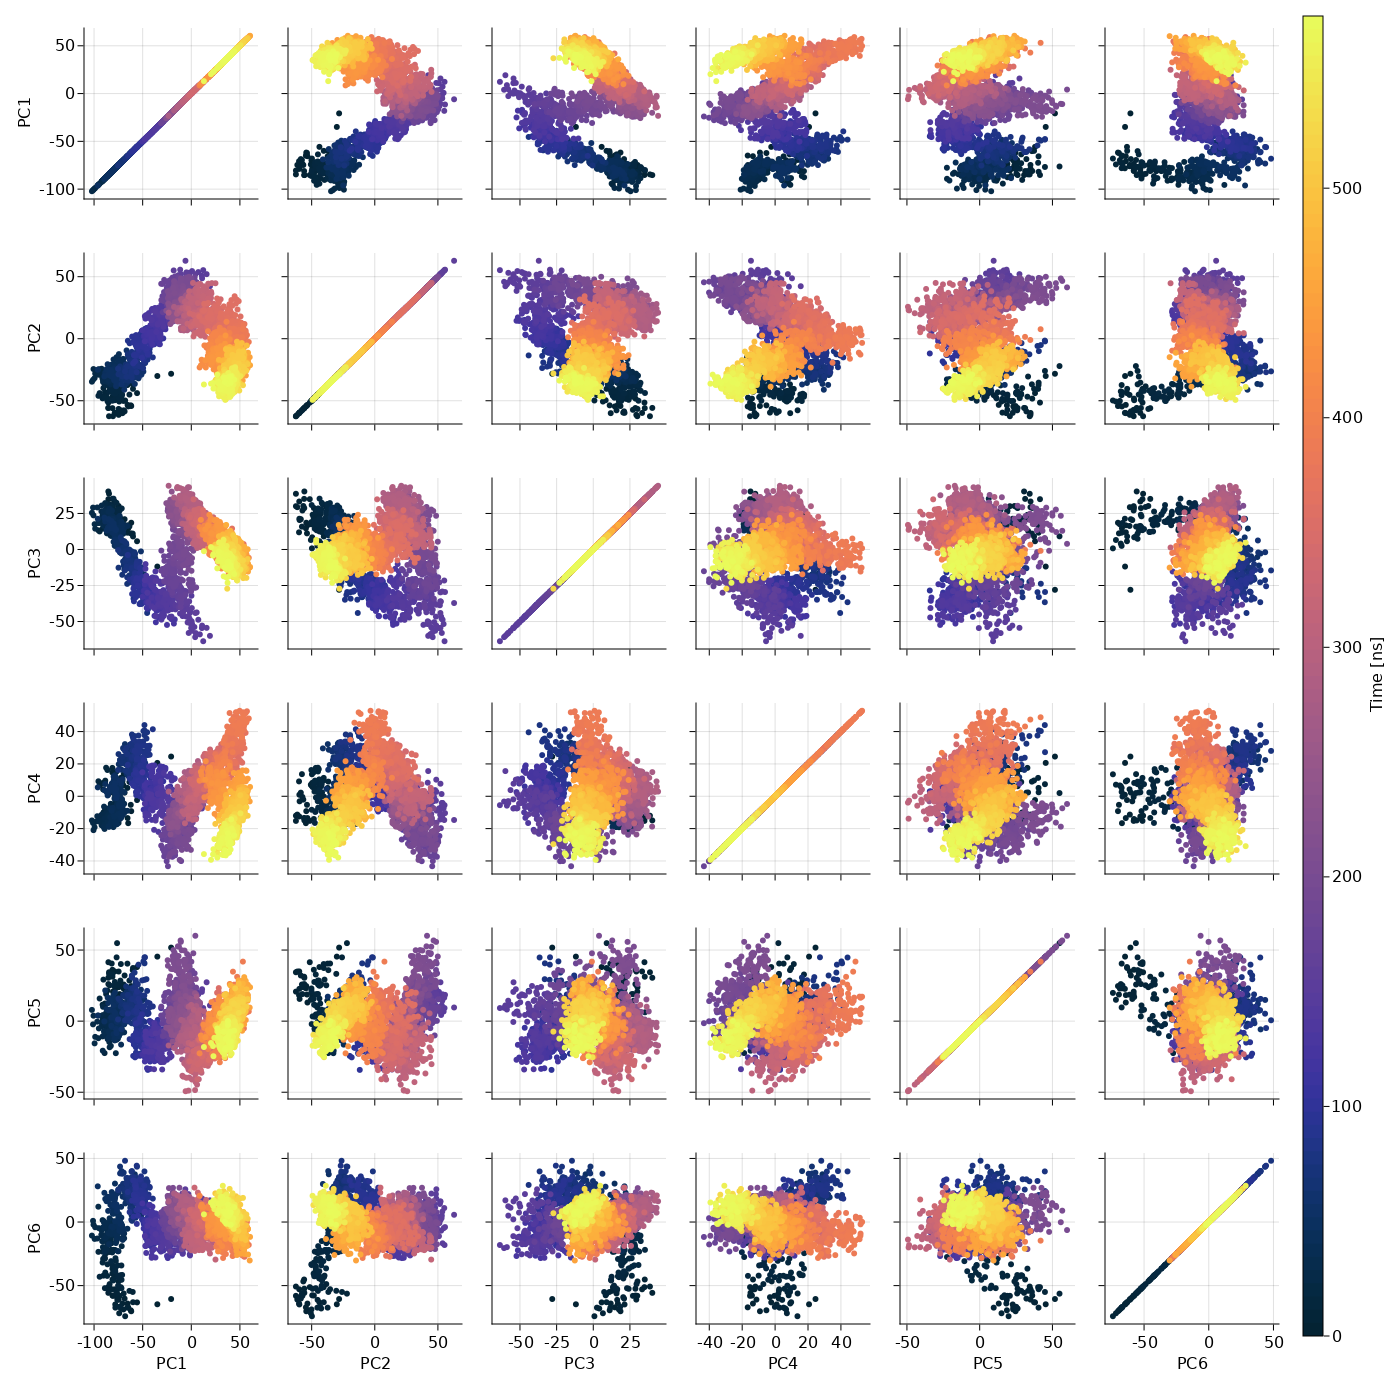

In [9]:
df = DataFrame(CSV.File("../data/analysis/pca.csv"));
df_time = df[:,1];
df = df[:,2:end];
pp = pairplot(df[:,1:6], stride=4, cbar=true, cbar_range=(0,df_time[end]))

In [10]:
save(plotpath+"pca_cbar.pdf", pp)
save(plotpath+"pca_cbar.png", pp)

CairoScreen{Cairo.CairoSurfaceBase{UInt32}} with surface:
Cairo.CairoSurfaceBase{UInt32}(Ptr{Nothing} @0x000055a6e94f9480, 1400.0, 1400.0)


In [11]:
df = DataFrame(CSV.File("../data/analysis/pca_cut.csv"));
df_time = df[:,1];
df = df[:,2:end];

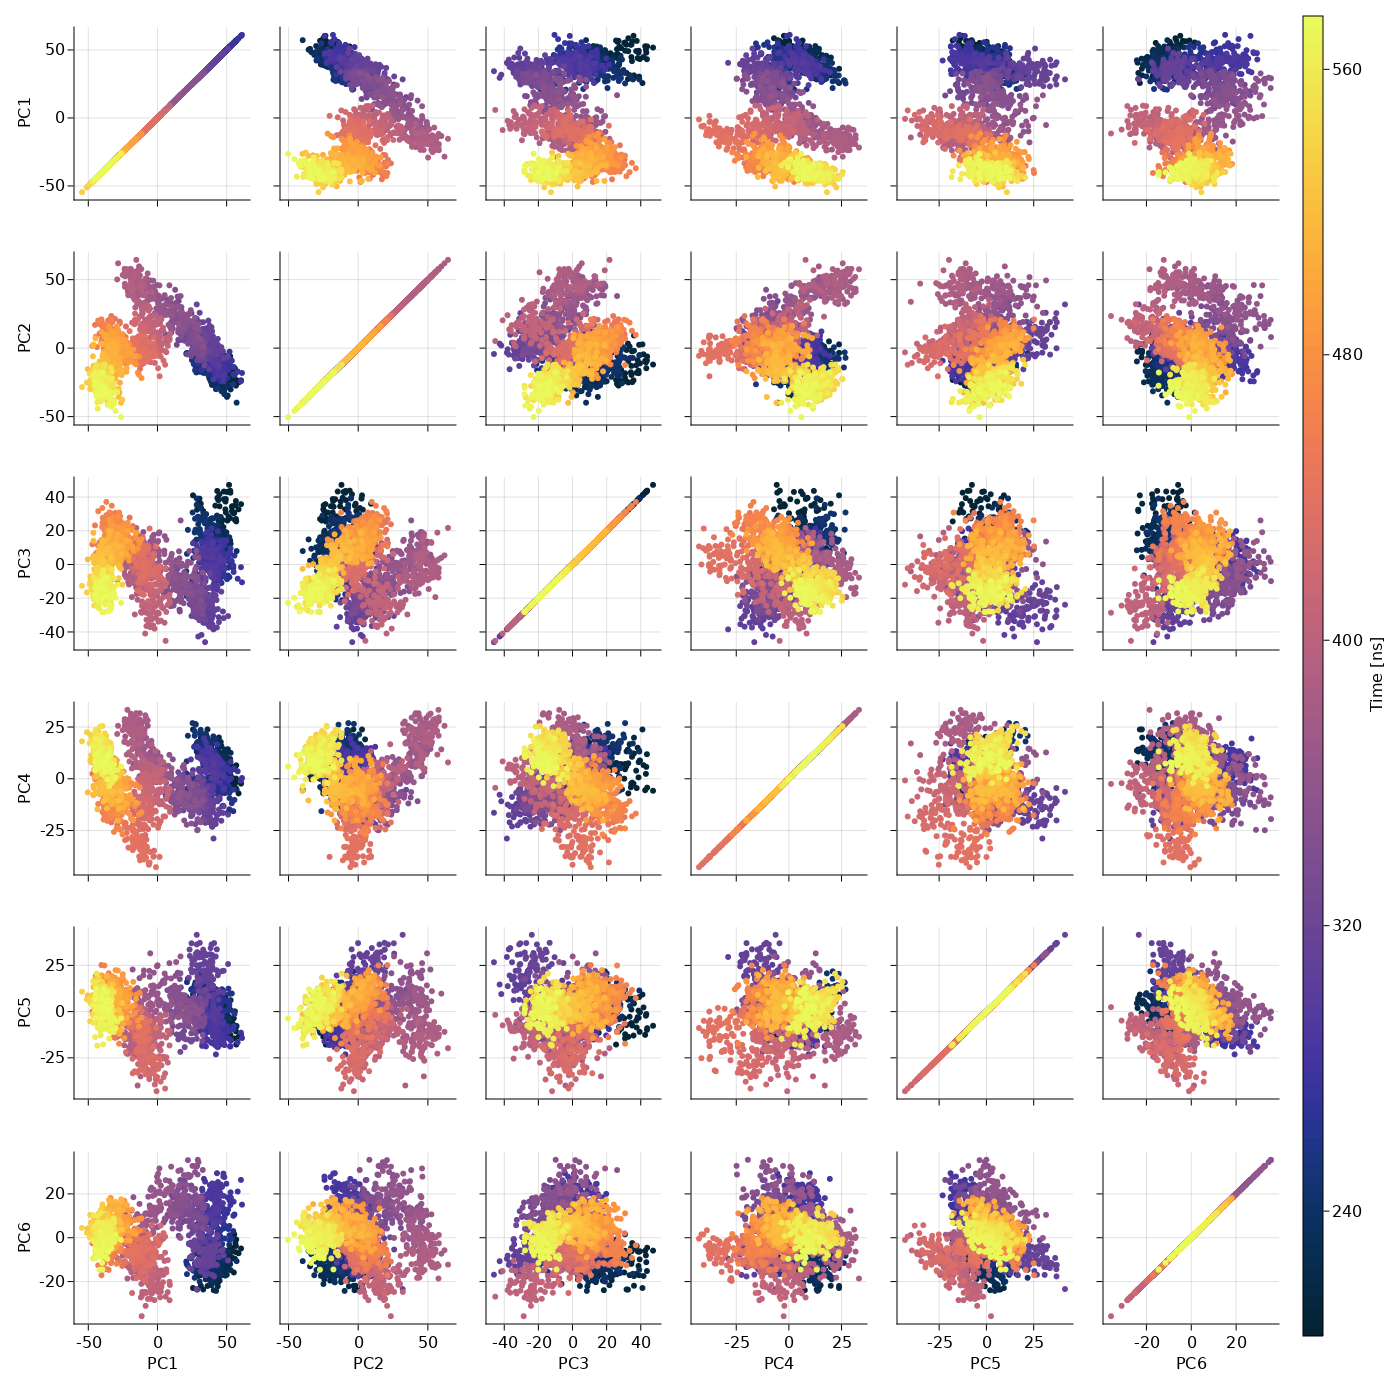

In [12]:
pp = pairplot(df[:,1:6], stride=4, cbar=true, cbar_range=(205,df_time[end]+205))

In [13]:
save(plotpath+"pca_cut_cbar.pdf", pp)
save(plotpath+"pca_cut_cbar.png", pp)

CairoScreen{Cairo.CairoSurfaceBase{UInt32}} with surface:
Cairo.CairoSurfaceBase{UInt32}(Ptr{Nothing} @0x000055a6e9271bc0, 1400.0, 1400.0)


In [8]:
df_time[end]

369.95